# Module 2: Assignment - Real-world Application of Supervised Learning

Apply supervised learning techniques to a real-world dataset to solve a prediction problem. Use at least two different supervised learning algorithms to train models and perform a comparative analysis of their performance.

## Problem Statement
Predict the quality of wine based on its chemical properties using supervised learning techniques. We will use the Wine Quality dataset, which includes 11 features such as acidity, residual sugar, and alcohol content.

## Data Preprocessing
Using the "Wine Quality" dataset from the UCI Machine Learning Repository which involves predicting the quality of the wine based on various chemical properties.

Starting with data preprocessing
- Loading the data and check for missing values
- Transformations (Enconding, Scaling)

<Figure size 640x480 with 0 Axes>

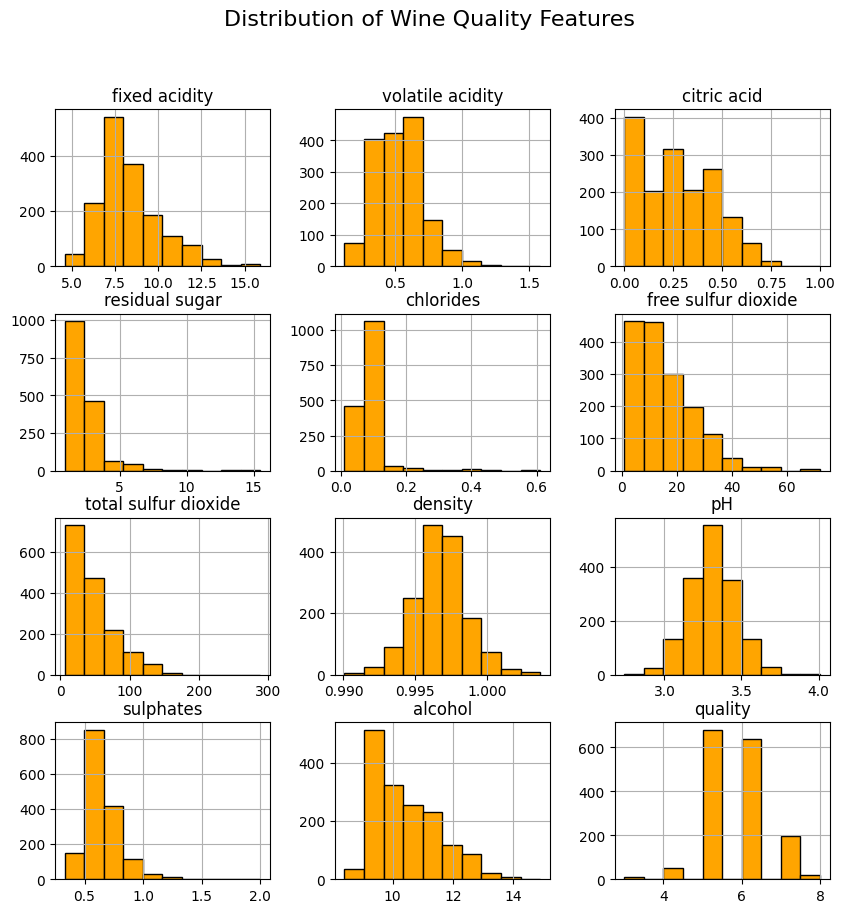

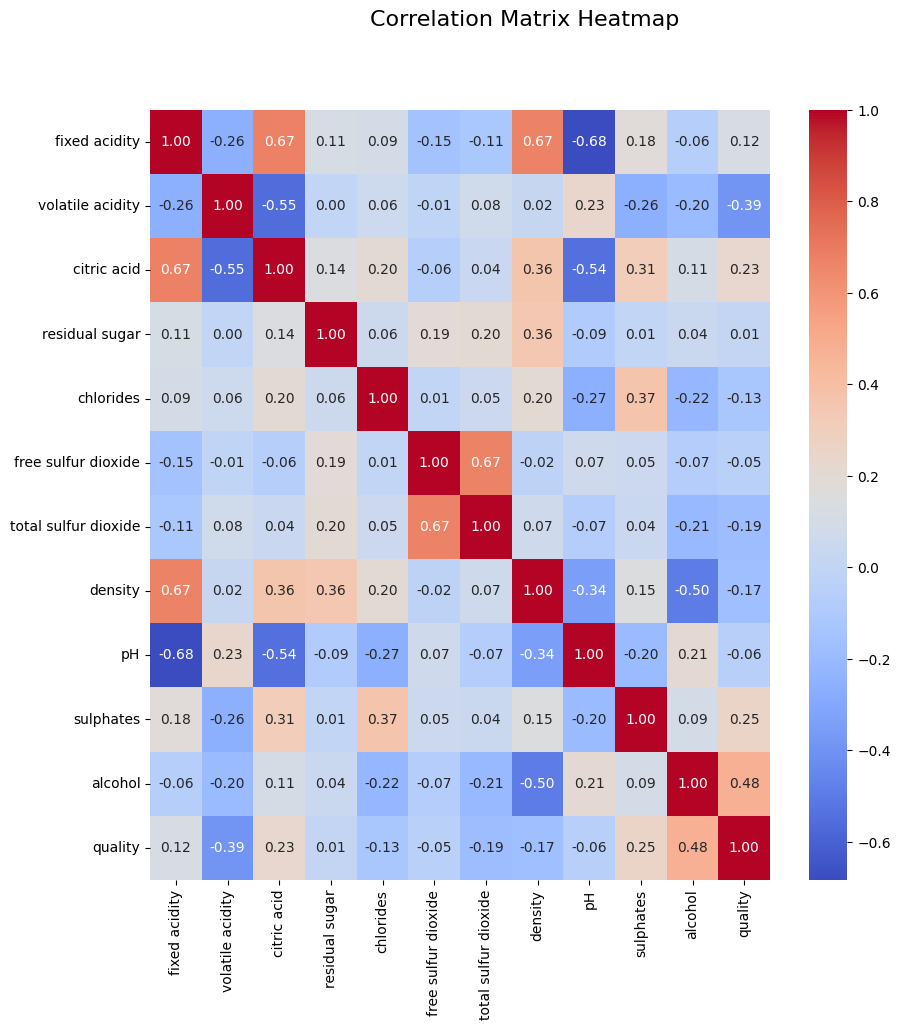

Missing values in the dataset
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

# Adjust the layout of subplots
plt.tight_layout()
data = pd.read_csv('data/winequality-red.csv')

# check for first few rows
# print(data.head())

# Histogram of each feature
data.hist(bins=10, figsize=(10, 10), color='orange', edgecolor='black')
plt.suptitle('Distribution of Wine Quality Features', fontsize=16)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.suptitle('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Check for missing values
print('Missing values in the dataset')
print(data.isnull().sum())

In [ ]:
# Transform the target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using 'quality' as target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training
Using two algorithms
1. RandomForestRegressor
2. GradientBoostingRegressor

In [27]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)

# Log best parameters and model
best_rf = grid_rf.best_estimator_
print("Best parameters for RandomForestRegressor: ", grid_rf.best_params_)


Best parameters for RandomForestRegressor:  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}


In [26]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_scaled, y_train)

# Log best parameters and model
best_gb = grid_gb.best_estimator_
print("Best parameters for GradientBoostingRegressor: ", grid_gb.best_params_)

Best parameters for GradientBoostingRegressor:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


### Model Evaluation

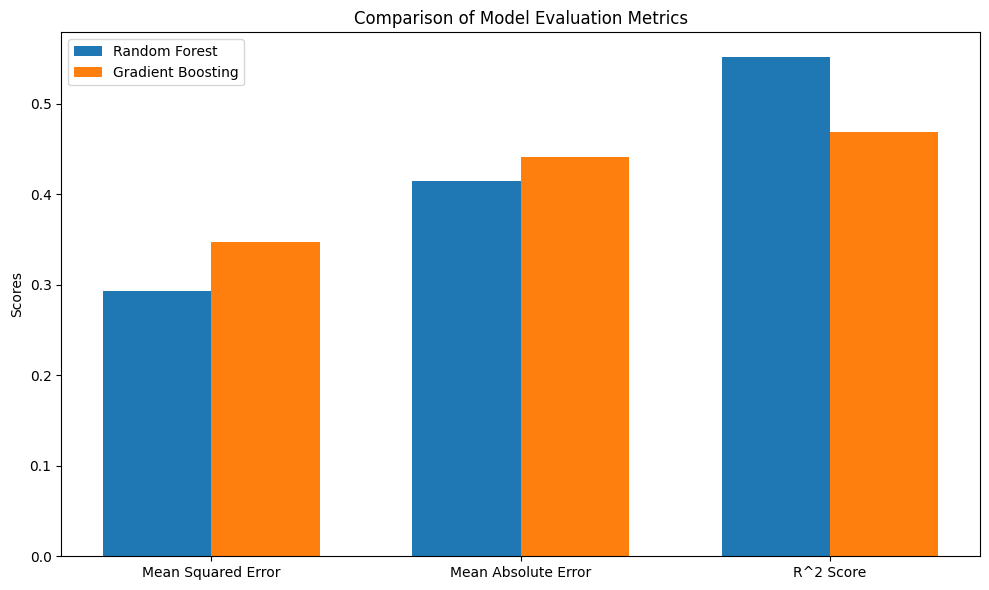

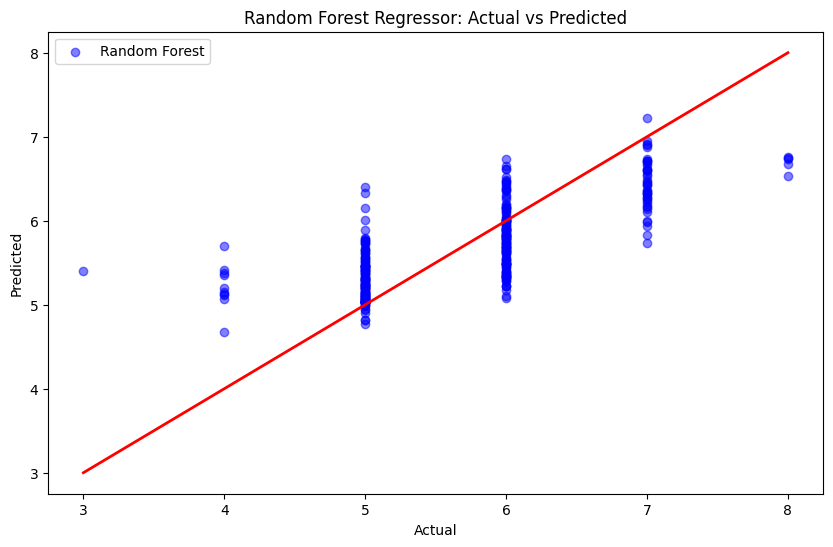

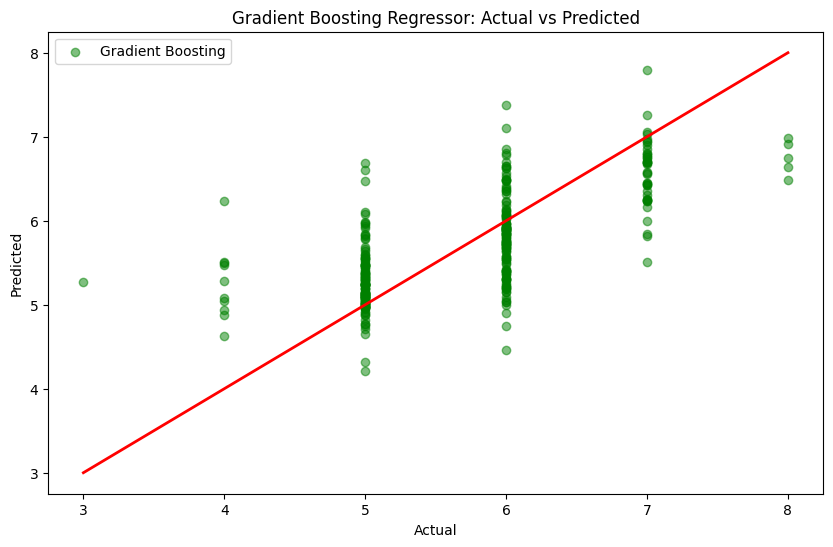

In [29]:
# Evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# RandomForestRegressor
y_pred_rf = best_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# print("Random Forest Regressor:")
# print("Mean Squared Error: ", mse_rf)
# print("Mean Absolute Error: ", mae_rf)
# print("R^2 Score: ", r2_rf)

# GradientBoostingRegressor
y_pred_gb = best_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# print("\nGradient Boosting Regressor:")
# print("Mean Squared Error: ", mse_gb)
# print("Mean Absolute Error: ", mae_gb)
# print("R^2 Score: ", r2_gb)

# Data for comparison
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
rf_values = [mse_rf, mae_rf, r2_rf]
gb_values = [mse_gb, mae_gb, r2_gb]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest')
rects2 = ax.bar(x + width/2, gb_values, width, label='Gradient Boosting')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()



## Comparative Analysis
In this analysis, I compare the performance of two supervised learning algorithms, Random Forest Regressor and Gradient Boosting Regressor, in predicting the quality of wine based on various chemical properties. The performance metrics used for this comparison are Mean Squared Error (MSE), Mean Absolute Error (MAE), and R^2 Score.

### Performance Metrics
**Random Forest Regressor:**
- **Mean Squared Error (MSE):** 0.2932
- **Mean Absolute Error (MAE):** 0.4151
- **R^2 Score:** 0.5513

**Gradient Boosting Regressor:**
- **Mean Squared Error (MSE):** 0.3473
- **Mean Absolute Error (MAE):** 0.4409
- **R^2 Score:** 0.4685

### Interpretation of Results
- **Mean Squared Error (MSE):**
  - The MSE for the Random Forest Regressor is lower (0.2932) compared to the Gradient Boosting Regressor (0.3473). This indicates that the Random Forest Regressor has a better fit to the data, as it has a lower average squared difference between the predicted and actual values.
- **Mean Absolute Error (MAE):**
  - The MAE for the Random Forest Regressor is also lower (0.4151) compared to the Gradient Boosting Regressor (0.4409). This suggests that the Random Forest Regressor's predictions are, on average, closer to the actual values than those of the Gradient Boosting Regressor.
- **R^2 Score:**
  - The R^2 Score for the Random Forest Regressor is higher (0.5513) compared to the Gradient Boosting Regressor (0.4685). The R^2 Score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R^2 Score indicates a better fit of the model to the data.

### Strengths and Weaknesses
**Random Forest Regressor:**
- **Strengths:**
  - **Performance:** Exhibits better performance with lower MSE and MAE, and a higher R^2 Score.
  - **Robustness:** Less sensitive to overfitting due to averaging multiple decision trees.
  - **Feature Importance:** Provides insights into feature importance, which can be valuable for understanding the model.
- **Weaknesses:**
  - **Computationally Intensive:** Can be computationally expensive, especially with a large number of trees and features.
  - **Interpretability:** Individual trees are interpretable, but the overall model can be complex to interpret.

**Gradient Boosting Regressor:**
- **Strengths:**
  - **Accuracy:** Can provide high predictive accuracy through boosting, by sequentially correcting errors of the weak learners.
  - **Flexibility:** Capable of handling various loss functions and providing robust performance.
- **Weaknesses:**
  - **Overfitting:** More prone to overfitting, especially with a high number of boosting stages.
  - **Training Time:** Generally requires more training time due to the sequential nature of boosting.

### Conclusion
Based on the evaluation metrics, the Random Forest Regressor outperforms the Gradient Boosting Regressor in this specific task of predicting wine quality. The Random Forest Regressor shows lower MSE and MAE, and a higher R^2 Score, indicating better overall performance. However, both models have their respective strengths and weaknesses.

For tasks where interpretability and computational efficiency are critical, the Random Forest Regressor may be preferable. On the other hand, for scenarios requiring high predictive accuracy and flexibility, despite the potential for overfitting, the Gradient Boosting Regressor can be a strong candidate.

Future work could involve further hyperparameter tuning, feature engineering, and exploring other advanced algorithms to potentially enhance predictive performance. This analysis demonstrates the importance of evaluating multiple models to select the best one for a given predictive task.